# ML Challenge - Data preparation (file 1/4)

Note: this is the first of the 4 .ipynb files included in the repo. It contains most steps performed to explore, clean and prepare the data before training and evaluating the ML models. The original datasets are not included in this repo, so paths below must be replaced with the real paths before running the script.

## 1. Import libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import pickle
from datetime import datetime

## 2. Open, explore, clean data

Open csv file

In [69]:
sales = pd.read_csv('Sales.csv')
sales.head(4)

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380


Explore, clean data

In [21]:
# Checking data types:
sales.dtypes

# Most are integers. State_holiday and Date must be changed.

True_index              int64
Store_ID                int64
Day_of_week             int64
Date                   object
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
Sales                   int64
dtype: object

In [22]:
# Checking unique values for State_holiday
sales['State_holiday'].value_counts()

# For State_holiday, we will need to transform it to numerical values using one-hot encoding

0    621160
a     12842
b      4214
c      2624
Name: State_holiday, dtype: int64

In [14]:
sales.describe()

,True_index,Store_ID,Day_of_week,Nb_customers_on_day,Open,Promotion,School_holiday,Sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [23]:
# Checking for nulls:

sales.isnull().any(axis=1).sum()

# There are no nulls

0

In [ ]:
# Dropping unnecessary columns (True_index)
sales.drop(columns=['True_index'], axis=1, inplace=True)

In [71]:
# Convert State_holiday to dummies 

sales_dummies = pd.get_dummies(sales['State_holiday'], prefix='State_holiday')
sales_dummies


,State_holiday_0,State_holiday_a,State_holiday_b,State_holiday_c
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
640835,1,0,0,0
640836,1,0,0,0
640837,1,0,0,0
640838,1,0,0,0


In [72]:
# Merge dummies with sales dataframe

sales_updated = pd.merge(left=sales,
                            right = sales_dummies,
                            left_index = True,
                            right_index = True)

In [83]:
# Drop original State_holiday column

sales_updated.drop(columns=['State_holiday'], axis=1, inplace=True)

In [84]:
# Check that dataframes have been successfully merged, State_holiday dropped

sales_updated

,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,School_holiday,Sales,State_holiday_0,State_holiday_a,State_holiday_b,State_holiday_c
0,625,3,734874,641,1,1,0,7293,1,0,0,0
1,293,2,734884,877,1,1,1,7060,1,0,0,0
2,39,4,735256,561,1,1,0,4565,1,0,0,0
3,676,4,734894,1584,1,1,0,6380,1,0,0,0
4,709,3,735255,1477,1,1,0,11647,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
640835,674,6,735253,611,1,0,0,4702,1,0,0,0
640836,1014,4,735613,1267,1,1,0,12545,1,0,0,0
640837,135,6,735618,595,1,0,0,5823,1,0,0,0
640838,810,1,735251,599,1,1,1,7986,1,0,0,0


In [75]:
# Convert date to ordinal values

def convert_date_to_ordinal(date):
    return datetime.strptime(date, '%Y-%M-%d').toordinal()

sales_updated['Date'] = sales_updated['Date'].apply(convert_date_to_ordinal)


Analyze data, correlations

In [76]:
# Checking correlation between features:

sales_updated.corr()

,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,School_holiday,Sales,State_holiday_0,State_holiday_a,State_holiday_b,State_holiday_c
Store_ID,1.000000,0.000329,-0.000199,0.023605,-0.001108,-0.000364,-0.000706,0.004804,-0.000503,0.001005,0.000016,-0.000866
Day_of_week,0.000329,1.000000,0.002807,-0.385616,-0.527947,-0.392736,-0.206069,-0.461107,0.053206,-0.041343,-0.040759,-0.001438
Date,-0.000199,0.002807,1.000000,-0.002756,-0.000105,0.021188,-0.036102,0.022151,-0.003489,0.008671,0.015098,-0.028712
Nb_customers_on_day,0.023605,-0.385616,-0.002756,1.000000,0.617264,0.315858,0.071085,0.894872,0.227339,-0.182142,-0.103493,-0.083525
Open,-0.001108,-0.527947,-0.000105,0.617264,1.000000,0.294936,0.085213,0.678463,0.379613,-0.303459,-0.174644,-0.138651
Promotion,-0.000364,-0.392736,0.021188,0.315858,0.294936,1.000000,0.066565,0.451819,0.012813,-0.004241,0.019809,-0.050382
School_holiday,-0.000706,-0.206069,-0.036102,0.071085,0.085213,0.066565,1.000000,0.084484,-0.149864,0.030275,0.158722,0.137570
Sales,0.004804,-0.461107,0.022151,0.894872,0.678463,0.451819,0.084484,1.000000,0.254896,-0.204034,-0.116705,-0.093215
State_holiday_0,-0.000503,0.053206,-0.003489,0.227339,0.379613,0.012813,-0.149864,0.254896,1.000000,-0.803390,-0.457082,-0.360236
State_holiday_a,0.001005,-0.041343,0.008671,-0.182142,-0.303459,-0.004241,0.030275,-0.204034,-0.803390,1.000000,-0.011634,-0.009169


/var/folders/ym/cxv9j3js63z_00t5k8szn1ww0000gn/T/ipykernel_52604/3902124746.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


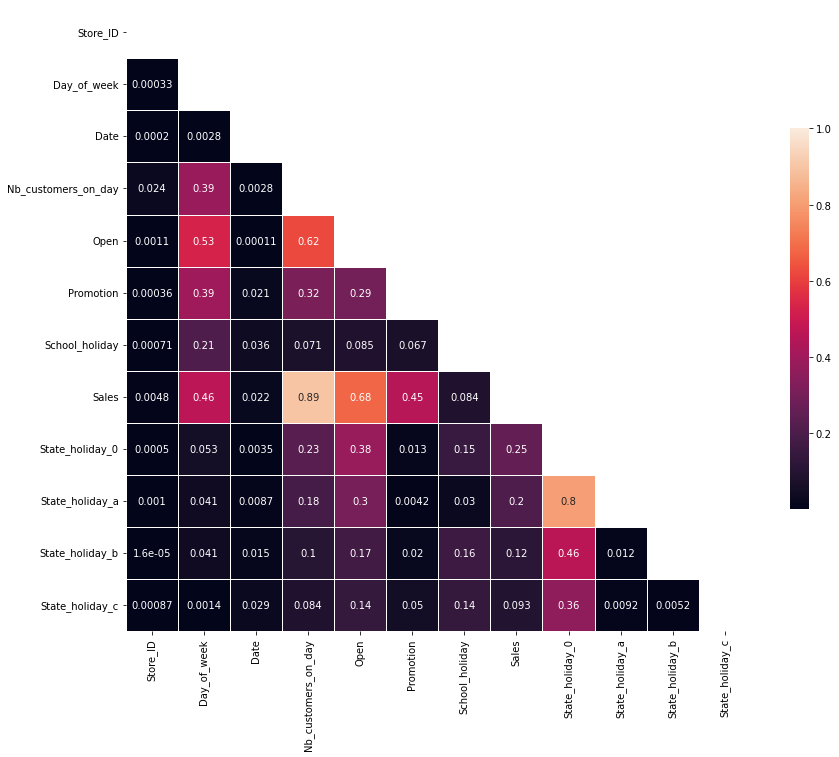

In [77]:
# Checking correlation with heatmap:

corr=np.abs(sales_updated.corr())

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(14, 14))

cmap = sn.diverging_palette(220, 10, as_cmap=True)

sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

Note: more analysis was performed (e.g. check for outliers), but considering the insights no other major changes were needed. See next steps in file 2

## Save cleaned data

In [ ]:
sales_updated.to_csv('sales_updated.csv')